In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcaGF5a19cT25lRHJpdmVcRGVza3RvcFwwMV9weXRob25fbWF0aF9tbF9jb3Vyc2VcbWF0aFxIb21ld29ya3Ncc29sdXRpb25zX3F1YXJ0bw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

C:\Users\hayk_\AppData\Local\Temp\ipykernel_35264\1268175638.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap.py": 1662373052.0, "C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap_external.py": 1662373052.0, "C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\lib\\codecs.py": 1662373052.0, "C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\aliases.py": 1662373052.0, "C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\__init__.py": 1662373052.0, "C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\utf_8.py": 1662373052.0, "C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\cp1252.py": 1662373052.0, "C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\lib\\abc.py": 1662373052.0, "C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\lib\\io.py": 1662373052.0, "C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\li

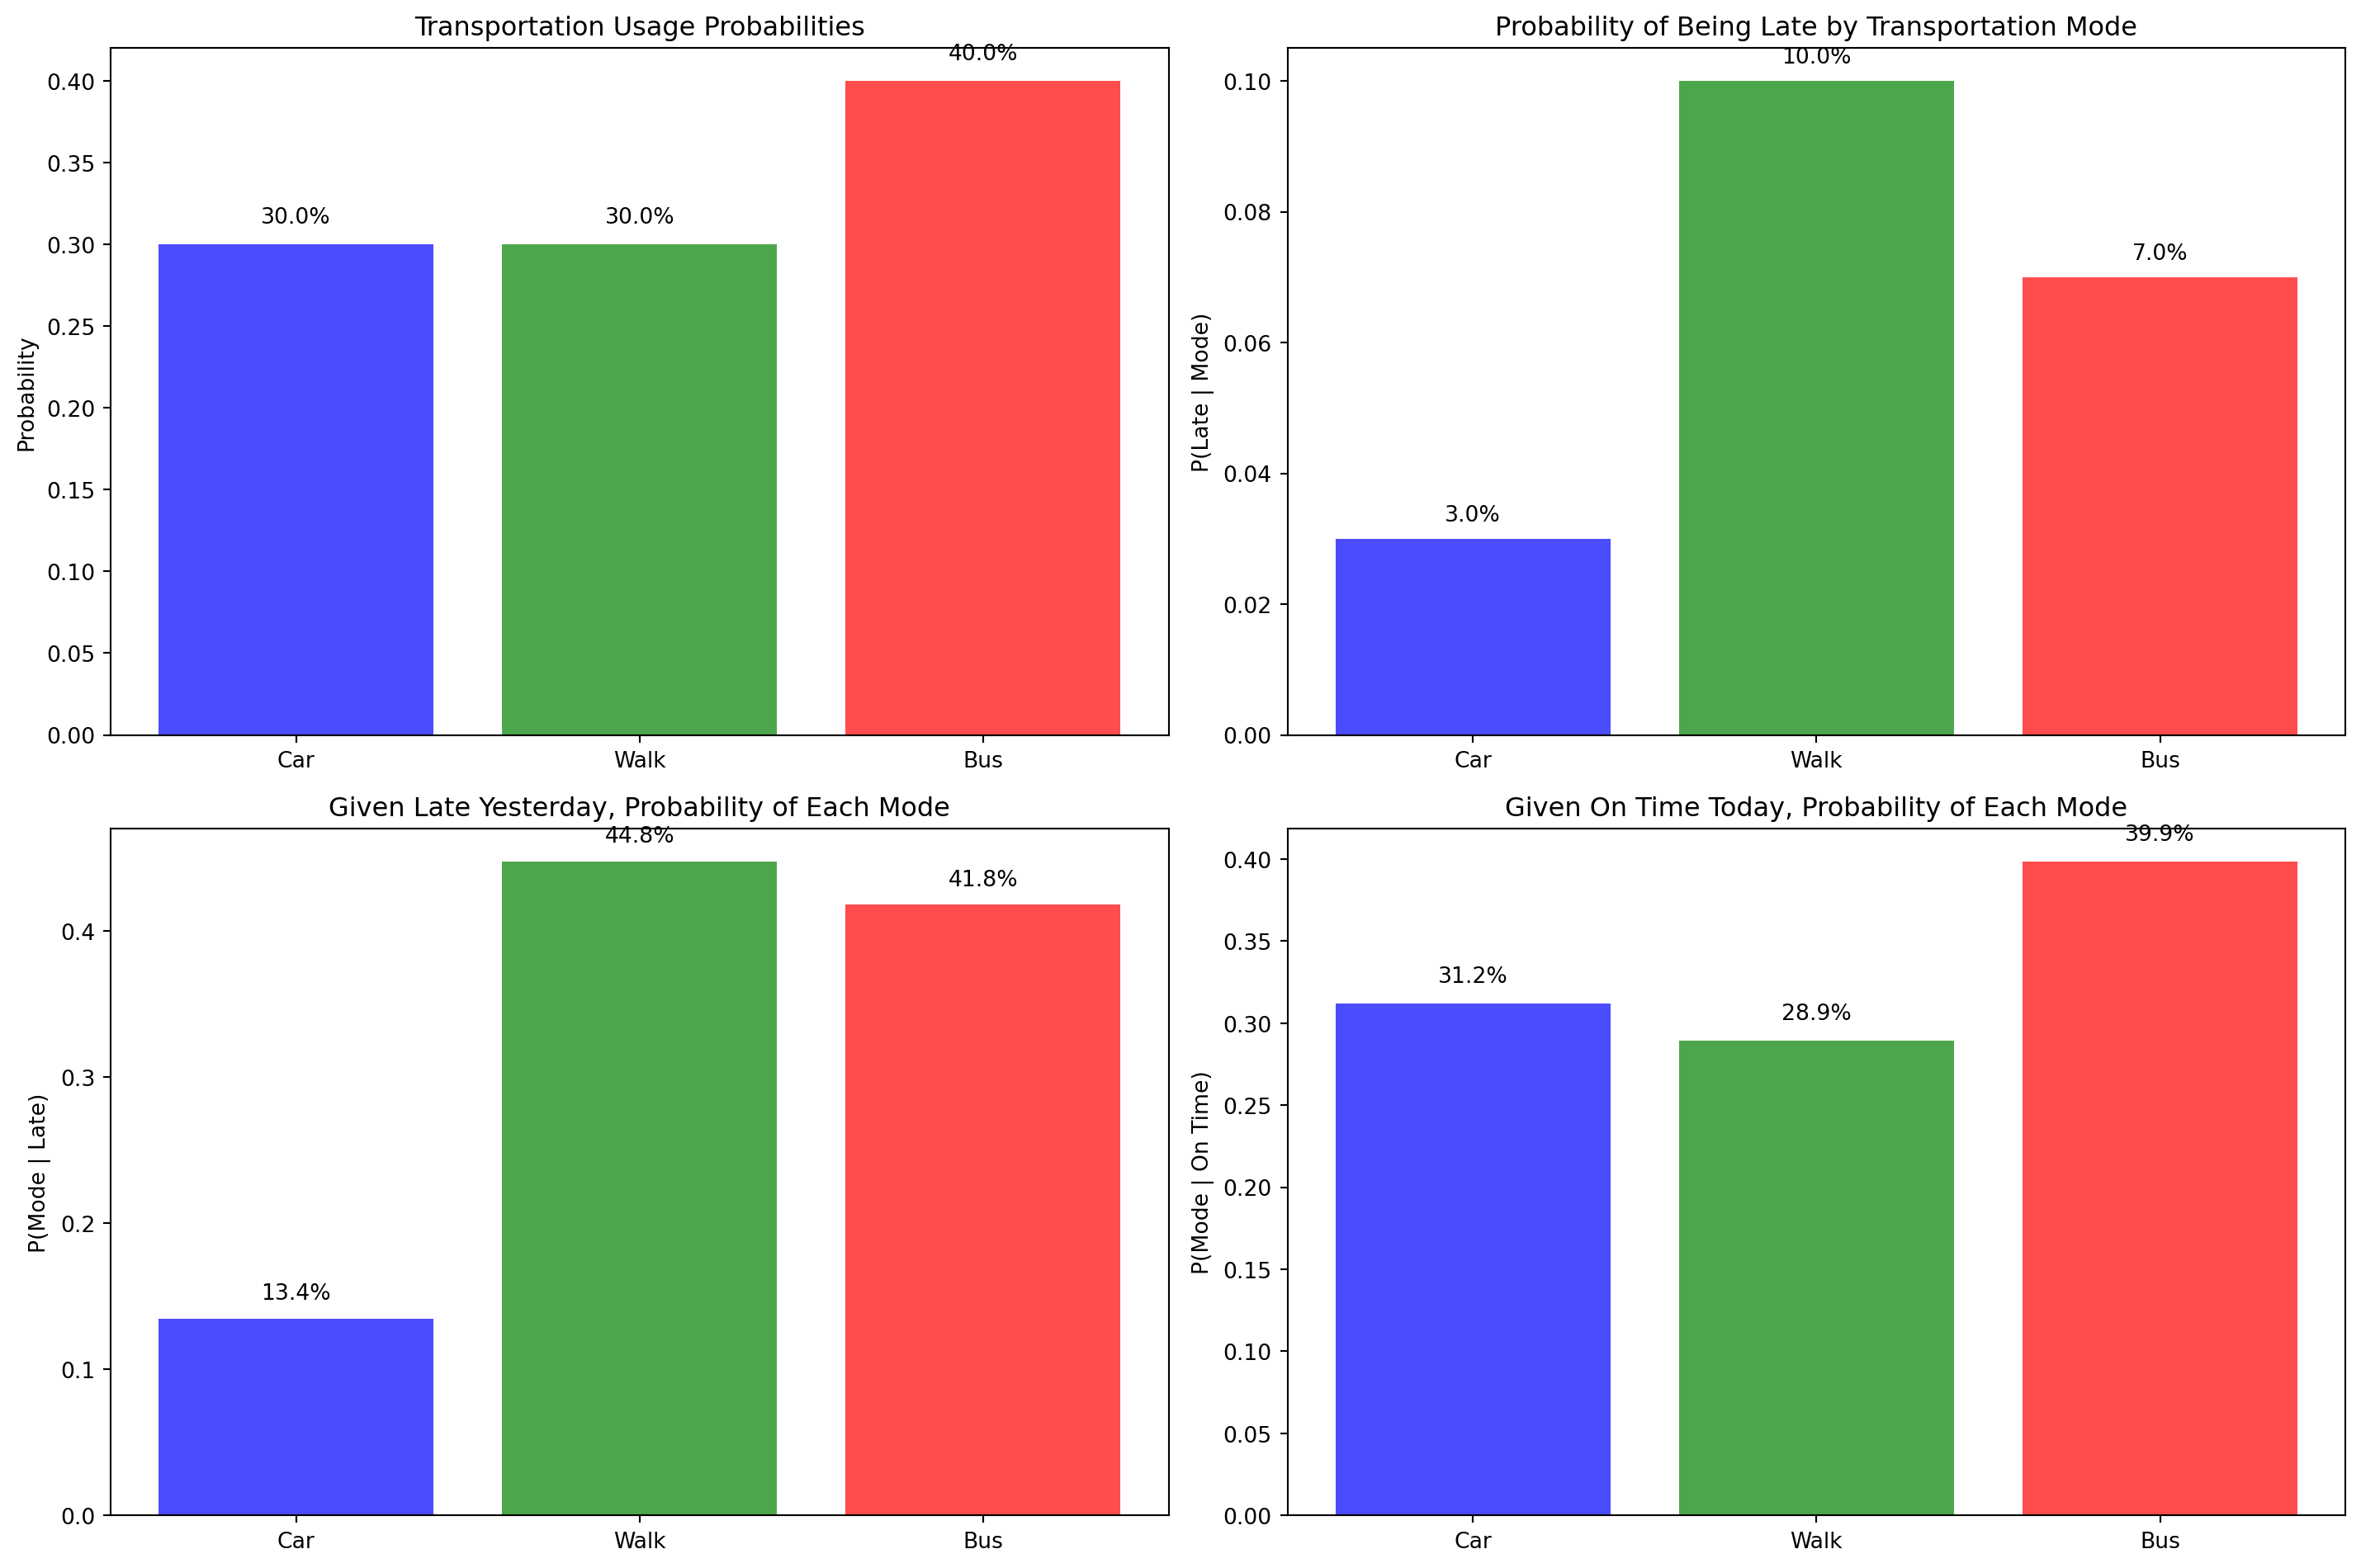

Part a) Given late, probability of bus: 0.418
Part b) Given on time, probability of walking: 0.289


In [2]:
#| label: fig-transportation-analysis
#| fig-cap: Transportation Mode Analysis
import matplotlib.pyplot as plt
import numpy as np

# Data
modes = ['Car', 'Walk', 'Bus']
usage_prob = [0.3, 0.3, 0.4]
late_prob = [0.03, 0.10, 0.07]
ontime_prob = [0.97, 0.90, 0.93]

# Calculate joint probabilities
late_joint = [u * l for u, l in zip(usage_prob, late_prob)]
ontime_joint = [u * o for u, o in zip(usage_prob, ontime_prob)]

# Total probabilities
total_late = sum(late_joint)
total_ontime = sum(ontime_joint)

# Posterior probabilities
late_posterior = [lj / total_late for lj in late_joint]
ontime_posterior = [oj / total_ontime for oj in ontime_joint]

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Usage probabilities
ax1.bar(modes, usage_prob, color=['blue', 'green', 'red'], alpha=0.7)
ax1.set_title('Transportation Usage Probabilities')
ax1.set_ylabel('Probability')
for i, v in enumerate(usage_prob):
    ax1.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom')

# Late probabilities by mode
ax2.bar(modes, late_prob, color=['blue', 'green', 'red'], alpha=0.7)
ax2.set_title('Probability of Being Late by Transportation Mode')
ax2.set_ylabel('P(Late | Mode)')
for i, v in enumerate(late_prob):
    ax2.text(i, v + 0.002, f'{v:.1%}', ha='center', va='bottom')

# Posterior: Given late, what mode?
ax3.bar(modes, late_posterior, color=['blue', 'green', 'red'], alpha=0.7)
ax3.set_title('Given Late Yesterday, Probability of Each Mode')
ax3.set_ylabel('P(Mode | Late)')
for i, v in enumerate(late_posterior):
    ax3.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom')

# Posterior: Given on time, what mode?
ax4.bar(modes, ontime_posterior, color=['blue', 'green', 'red'], alpha=0.7)
ax4.set_title('Given On Time Today, Probability of Each Mode')
ax4.set_ylabel('P(Mode | On Time)')
for i, v in enumerate(ontime_posterior):
    ax4.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print numerical results
print("Part a) Given late, probability of bus:", f"{late_posterior[2]:.3f}")
print("Part b) Given on time, probability of walking:", f"{ontime_posterior[1]:.3f}")

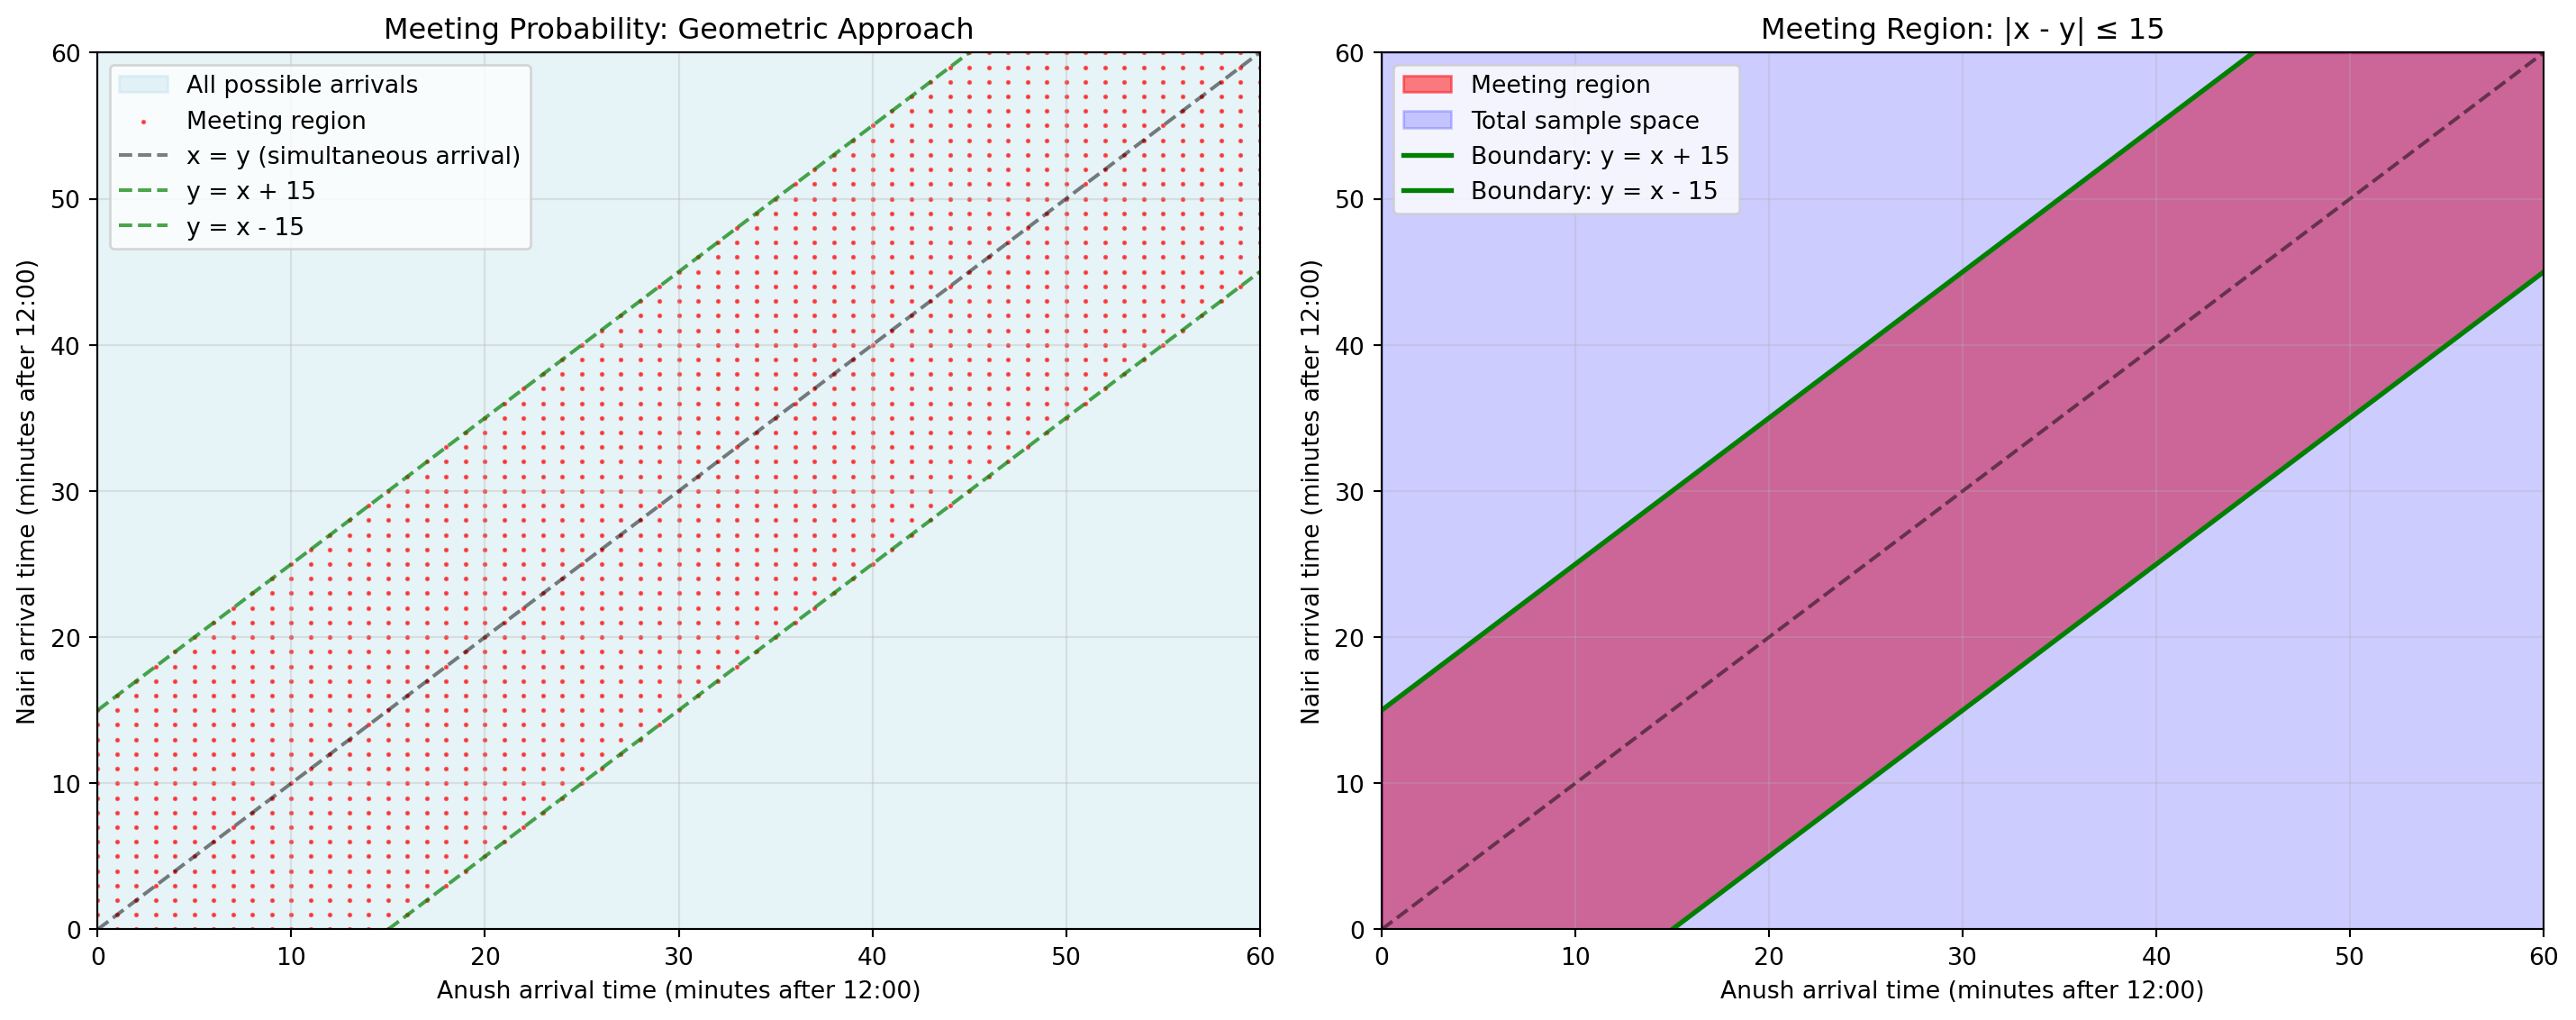

Total area: 3600
Meeting area: 1575.0
Probability of meeting: 0.438 = 1575.0/3600 = 7/16


In [3]:
#| label: fig-meeting-probability
#| fig-cap: Meeting Probability Visualization
import matplotlib.pyplot as plt
import numpy as np

# Create coordinate system (in minutes after 12:00)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Full square represents all possible arrival combinations
x = np.array([0, 60, 60, 0, 0])
y = np.array([0, 0, 60, 60, 0])

# Meeting region: |x - y| <= 15
x_meet = []
y_meet = []

# Generate points for the meeting region
for i in range(61):
    for j in range(61):
        if abs(i - j) <= 15:
            x_meet.append(i)
            y_meet.append(j)

# Plot 1: Show the meeting region
ax1.fill(x, y, alpha=0.3, color='lightblue', label='All possible arrivals')
ax1.scatter(x_meet, y_meet, c='red', s=1, alpha=0.6, label='Meeting region')
ax1.plot([0, 60], [0, 60], 'k--', alpha=0.5, label='x = y (simultaneous arrival)')
ax1.plot([0, 45], [15, 60], 'g--', alpha=0.7, label='y = x + 15')
ax1.plot([15, 60], [0, 45], 'g--', alpha=0.7, label='y = x - 15')
ax1.set_xlim(0, 60)
ax1.set_ylim(0, 60)
ax1.set_xlabel('Anush arrival time (minutes after 12:00)')
ax1.set_ylabel('Nairi arrival time (minutes after 12:00)')
ax1.set_title('Meeting Probability: Geometric Approach')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Analytical visualization
x_boundary = np.linspace(0, 60, 1000)
y_upper = np.minimum(x_boundary + 15, 60)
y_lower = np.maximum(x_boundary - 15, 0)

ax2.fill_between(x_boundary, y_lower, y_upper, alpha=0.5, color='red', label='Meeting region')
ax2.fill([0, 60, 60, 0], [0, 0, 60, 60], alpha=0.2, color='blue', label='Total sample space')
ax2.plot([0, 60], [0, 60], 'k--', alpha=0.5)
ax2.plot([0, 45], [15, 60], 'g-', linewidth=2, label='Boundary: y = x + 15')
ax2.plot([15, 60], [0, 45], 'g-', linewidth=2, label='Boundary: y = x - 15')
ax2.set_xlim(0, 60)
ax2.set_ylim(0, 60)
ax2.set_xlabel('Anush arrival time (minutes after 12:00)')
ax2.set_ylabel('Nairi arrival time (minutes after 12:00)')
ax2.set_title('Meeting Region: |x - y| ≤ 15')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate areas
total_area = 60 * 60
meeting_area = total_area - 2 * (45 * 45 / 2)
probability = meeting_area / total_area

print(f"Total area: {total_area}")
print(f"Meeting area: {meeting_area}")
print(f"Probability of meeting: {probability:.3f} = {meeting_area}/{total_area} = 7/16")

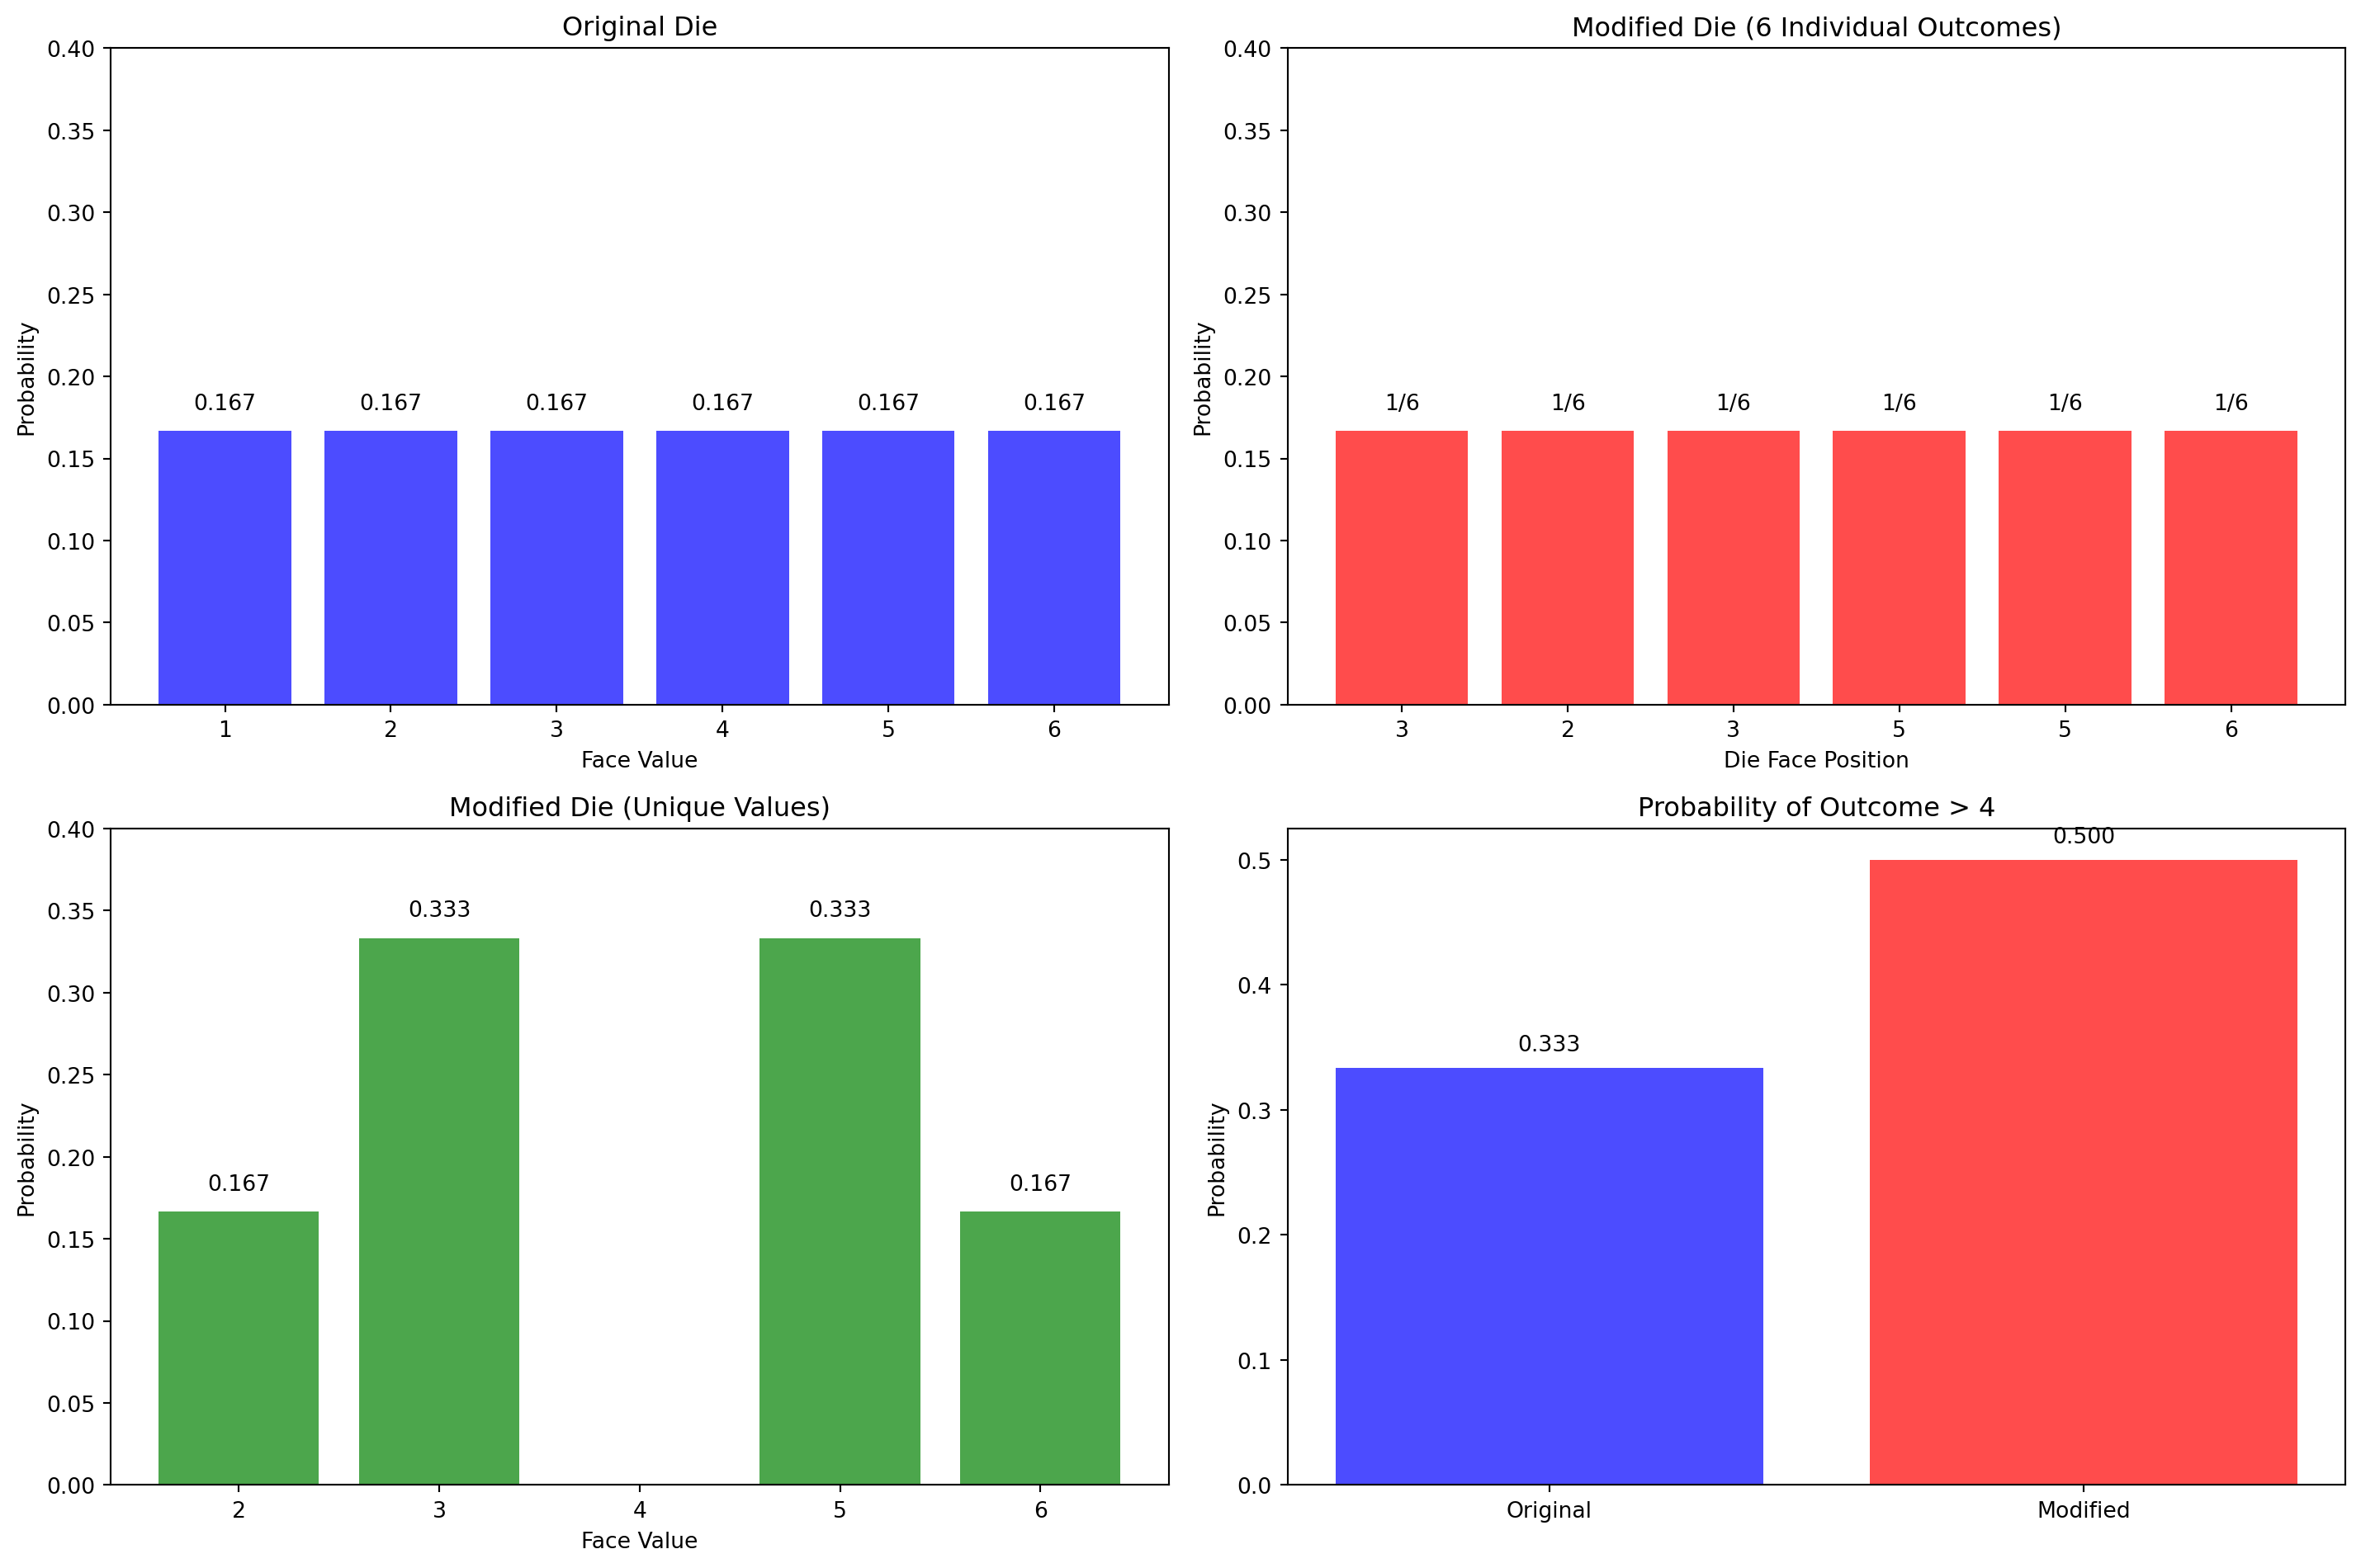

Modified die faces: [3, 2, 3, 5, 5, 6]
Unique faces and probabilities:
  Face 2: probability 0.167
  Face 3: probability 0.333
  Face 5: probability 0.333
  Face 6: probability 0.167

Probability of outcome > 4: 0.500
Expectation: 4.000
Variance: 2.000


In [4]:
#| label: fig-modified-die
#| fig-cap: Modified Die Analysis
import matplotlib.pyplot as plt
import numpy as np

# Original die
original_faces = [1, 2, 3, 4, 5, 6]
original_probs = [1/6] * 6

# Modified die
# ⚀ (1) becomes ⚂ (3), so we have: 3, 2, 3, 4, 5, 6
# But ⚃ (4) becomes ⚄ (5), so we have: 3, 2, 3, 5, 5, 6
modified_faces = [3, 2, 3, 5, 5, 6]
modified_probs = [1/6] * 6

# Count occurrences of each value
from collections import Counter
face_counts = Counter(modified_faces)
unique_faces = sorted(face_counts.keys())
probabilities = [face_counts[face]/6 for face in unique_faces]

# Calculate statistics
expectation = sum(face * prob for face, prob in zip(unique_faces, probabilities))
variance = sum((face - expectation)**2 * prob for face, prob in zip(unique_faces, probabilities))

# Probability of outcome > 4
prob_greater_than_4 = sum(prob for face, prob in zip(unique_faces, probabilities) if face > 4)

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Original die
ax1.bar(original_faces, original_probs, alpha=0.7, color='blue')
ax1.set_title('Original Die')
ax1.set_xlabel('Face Value')
ax1.set_ylabel('Probability')
ax1.set_ylim(0, 0.4)
for i, v in enumerate(original_probs):
    ax1.text(original_faces[i], v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Modified die (individual outcomes)
ax2.bar(range(1, 7), [1/6]*6, alpha=0.7, color='red')
ax2.set_title('Modified Die (6 Individual Outcomes)')
ax2.set_xlabel('Die Face Position')
ax2.set_ylabel('Probability')
ax2.set_xticks(range(1, 7))
ax2.set_xticklabels(['3', '2', '3', '5', '5', '6'])
ax2.set_ylim(0, 0.4)
for i in range(6):
    ax2.text(i+1, 1/6 + 0.01, '1/6', ha='center', va='bottom')

# Modified die (unique values)
ax3.bar(unique_faces, probabilities, alpha=0.7, color='green')
ax3.set_title('Modified Die (Unique Values)')
ax3.set_xlabel('Face Value')
ax3.set_ylabel('Probability')
ax3.set_ylim(0, 0.4)
for face, prob in zip(unique_faces, probabilities):
    ax3.text(face, prob + 0.01, f'{prob:.3f}', ha='center', va='bottom')

# Comparison of P(X > 4)
comparison_data = ['Original', 'Modified']
comparison_probs = [2/6, prob_greater_than_4]  # Original: P(5 or 6) = 2/6
ax4.bar(comparison_data, comparison_probs, alpha=0.7, color=['blue', 'red'])
ax4.set_title('Probability of Outcome > 4')
ax4.set_ylabel('Probability')
for i, v in enumerate(comparison_probs):
    ax4.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"Modified die faces: {modified_faces}")
print(f"Unique faces and probabilities:")
for face, prob in zip(unique_faces, probabilities):
    print(f"  Face {face}: probability {prob:.3f}")
print(f"\nProbability of outcome > 4: {prob_greater_than_4:.3f}")
print(f"Expectation: {expectation:.3f}")
print(f"Variance: {variance:.3f}")

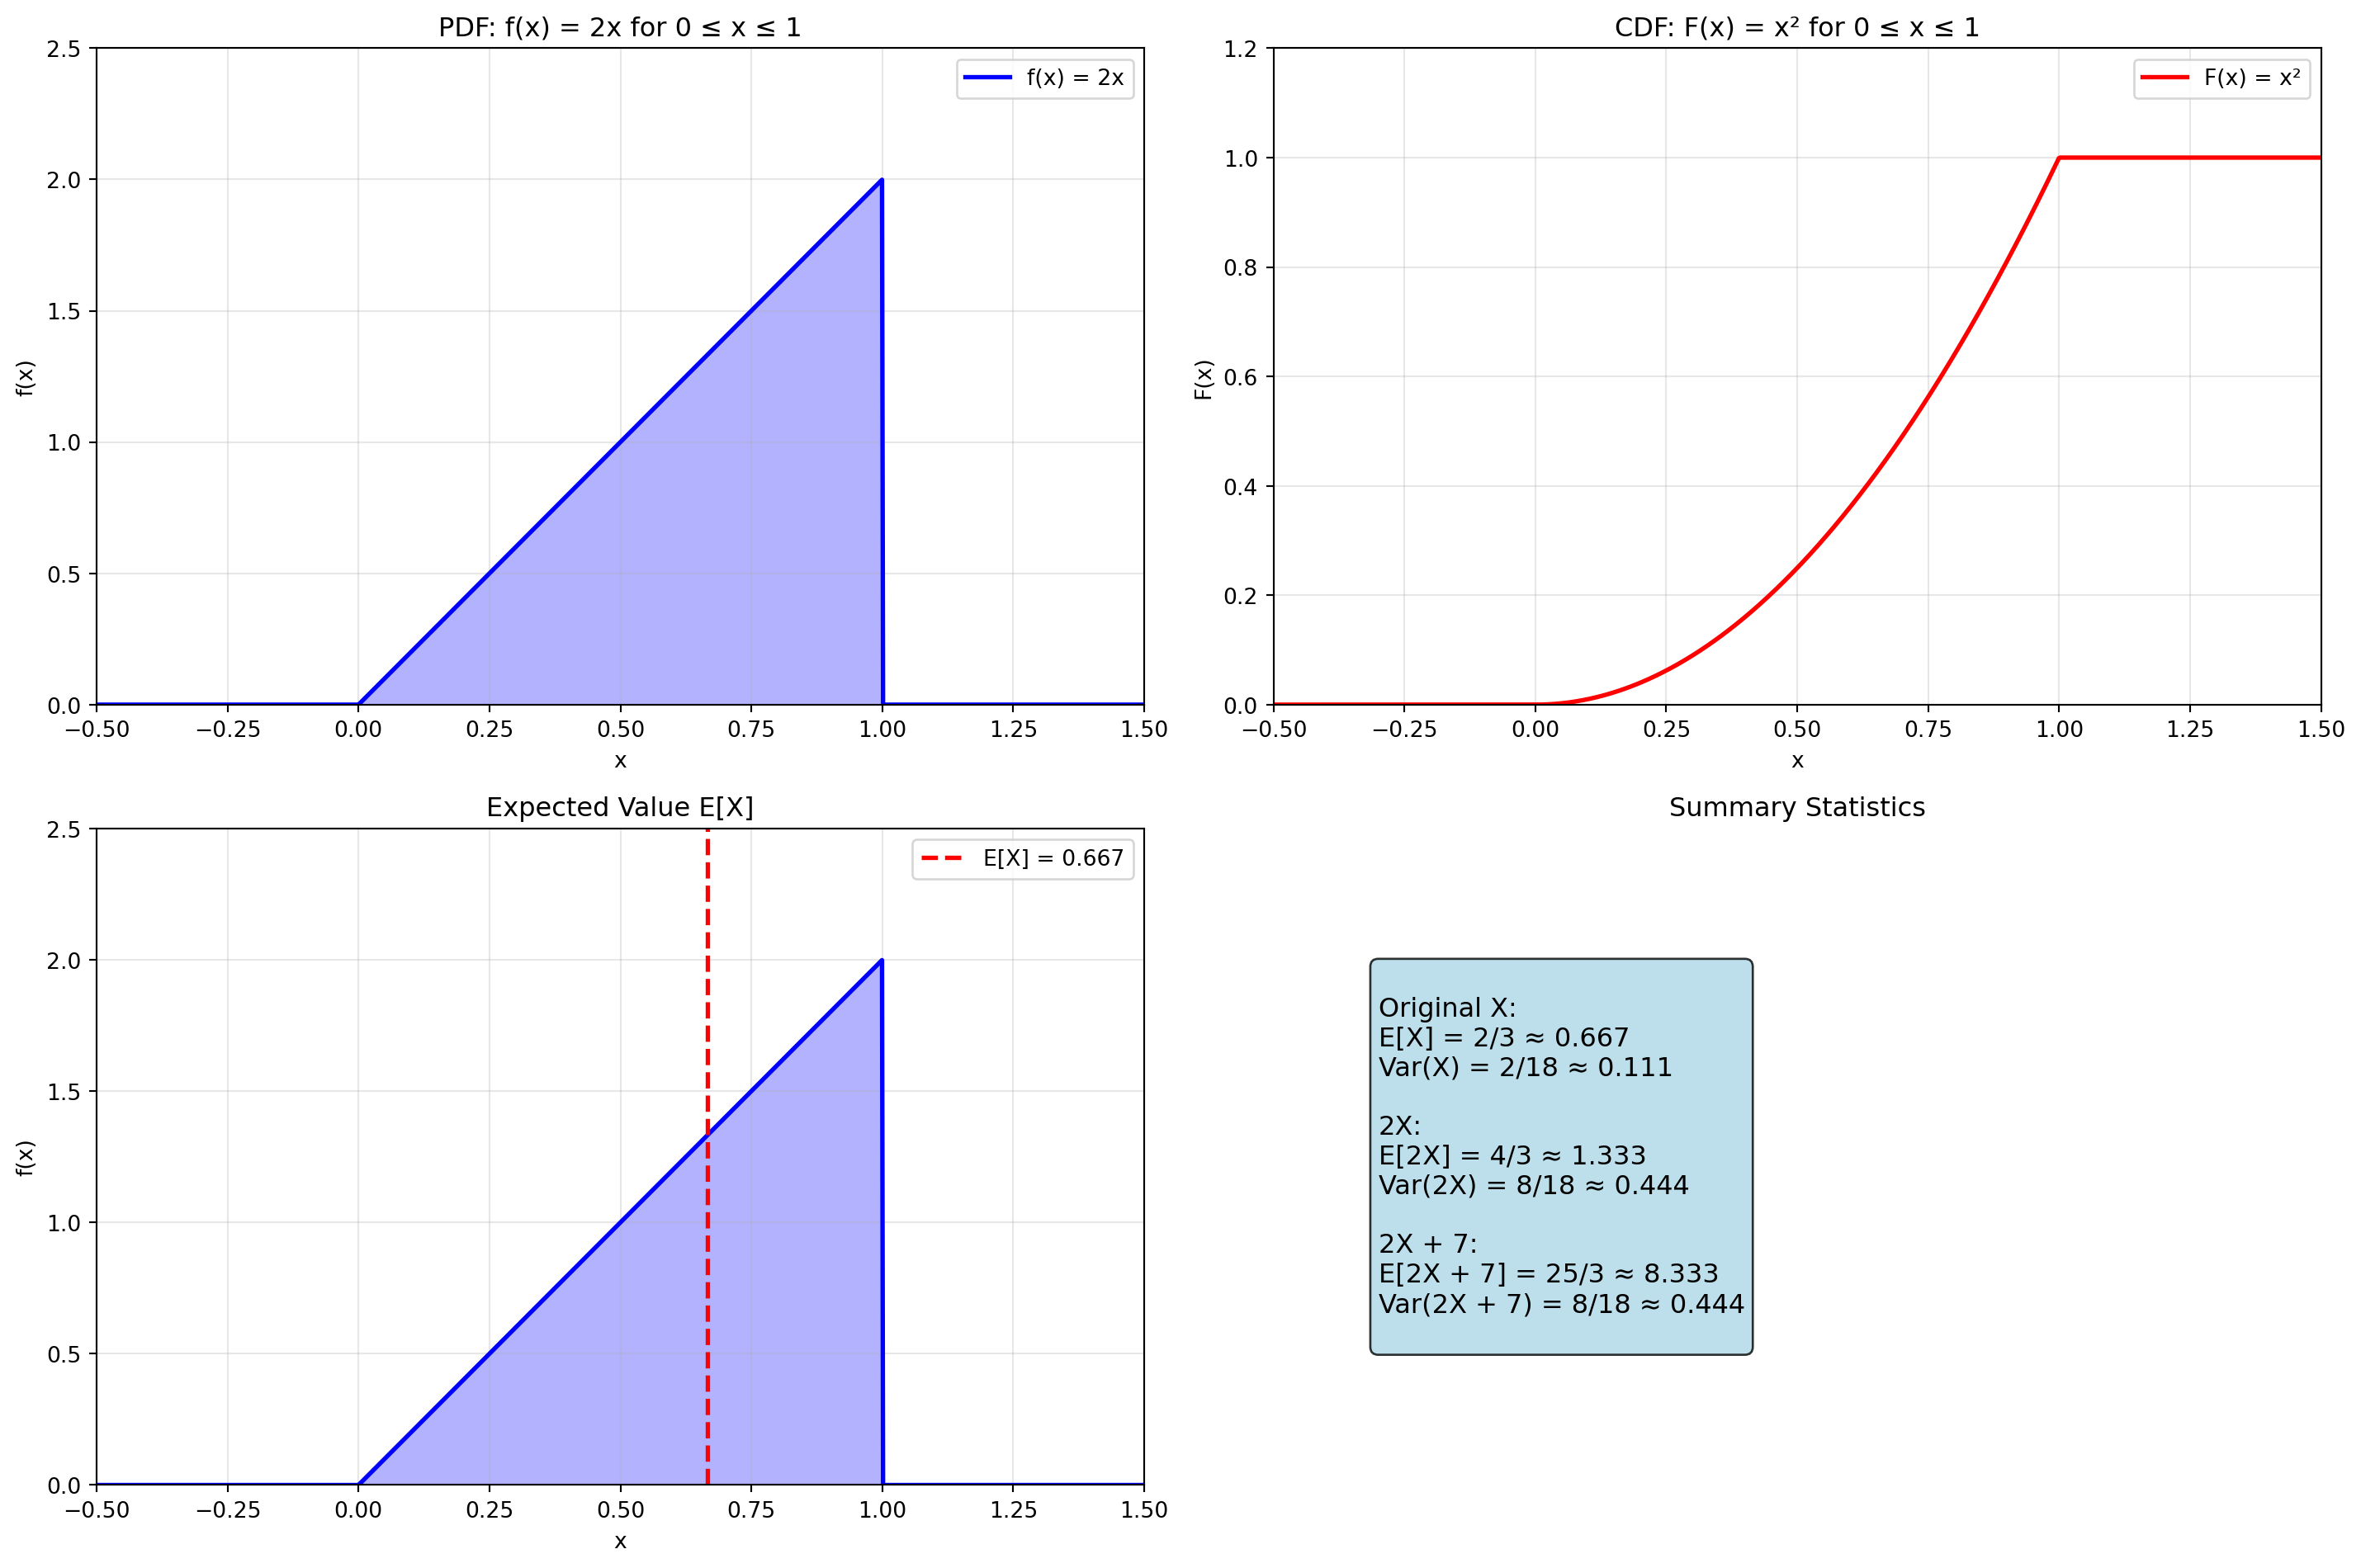

In [5]:
#| label: fig-continuous-pdf
#| fig-cap: Continuous PDF Analysis
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

# Define the PDF
def f(x):
    return np.where((x >= 0) & (x <= 1), 2*x, 0)

# Create x values
x = np.linspace(-0.5, 1.5, 1000)
y = f(x)

# Calculate moments analytically
# E[X] = integral of x * f(x) dx
# E[X^2] = integral of x^2 * f(x) dx

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot PDF
ax1.plot(x, y, 'b-', linewidth=2, label='f(x) = 2x')
ax1.fill_between(x, 0, y, alpha=0.3, color='blue')
ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(0, 2.5)
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('PDF: f(x) = 2x for 0 ≤ x ≤ 1')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot CDF
x_cdf = np.linspace(0, 1, 100)
F_x = x_cdf**2  # CDF is x^2 for 0 ≤ x ≤ 1
x_full = np.linspace(-0.5, 1.5, 1000)
F_full = np.where(x_full < 0, 0, np.where(x_full > 1, 1, x_full**2))

ax2.plot(x_full, F_full, 'r-', linewidth=2, label='F(x) = x²')
ax2.set_xlim(-0.5, 1.5)
ax2.set_ylim(0, 1.2)
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title('CDF: F(x) = x² for 0 ≤ x ≤ 1')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Visualization of E[X]
E_X = 2/3
ax3.plot(x, y, 'b-', linewidth=2)
ax3.axvline(E_X, color='red', linestyle='--', linewidth=2, label=f'E[X] = {E_X:.3f}')
ax3.fill_between(x, 0, y, alpha=0.3, color='blue')
ax3.set_xlim(-0.5, 1.5)
ax3.set_ylim(0, 2.5)
ax3.set_xlabel('x')
ax3.set_ylabel('f(x)')
ax3.set_title('Expected Value E[X]')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Summary statistics
stats_text = f"""
Original X:
E[X] = 2/3 ≈ 0.667
Var(X) = 2/18 ≈ 0.111

2X:
E[2X] = 4/3 ≈ 1.333
Var(2X) = 8/18 ≈ 0.444

2X + 7:
E[2X + 7] = 25/3 ≈ 8.333
Var(2X + 7) = 8/18 ≈ 0.444
"""

ax4.text(0.1, 0.5, stats_text, fontsize=12, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.axis('off')
ax4.set_title('Summary Statistics')

plt.tight_layout()
plt.show()